In [24]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline

In [4]:
#Loading housing dataset
df=pd.read_csv('kc_house_data.csv')

In [5]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,zipcode
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,98178
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,98125
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0,98028
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,98136
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,98074


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   condition      21613 non-null  int64  
 7   grade          21613 non-null  int64  
 8   sqft_above     21613 non-null  int64  
 9   sqft_basement  21613 non-null  int64  
 10  zipcode        21613 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1.8 MB


In [9]:
correlations=df.corr()
correlations

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,zipcode
price,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.036392,0.667463,0.605566,0.323837,-0.053168
bedrooms,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,0.028472,0.356967,0.477600,0.303093,-0.152668
bathrooms,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,-0.124982,0.664983,0.685342,0.283770,-0.203866
sqft_living,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,-0.058753,0.762704,0.876597,0.435043,-0.199430
sqft_lot,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,-0.008958,0.113621,0.183512,0.015286,-0.129574
floors,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,-0.263768,0.458183,0.523885,-0.245705,-0.059121
condition,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,1.000000,-0.144674,-0.158214,0.174105,0.003026
grade,0.667463,0.356967,0.664983,0.762704,0.113621,0.458183,-0.144674,1.000000,0.755923,0.168392,-0.184862
sqft_above,0.605566,0.477600,0.685342,0.876597,0.183512,0.523885,-0.158214,0.755923,1.000000,-0.051943,-0.261190
sqft_basement,0.323837,0.303093,0.283770,0.435043,0.015286,-0.245705,0.174105,0.168392,-0.051943,1.000000,0.074845


<AxesSubplot:>

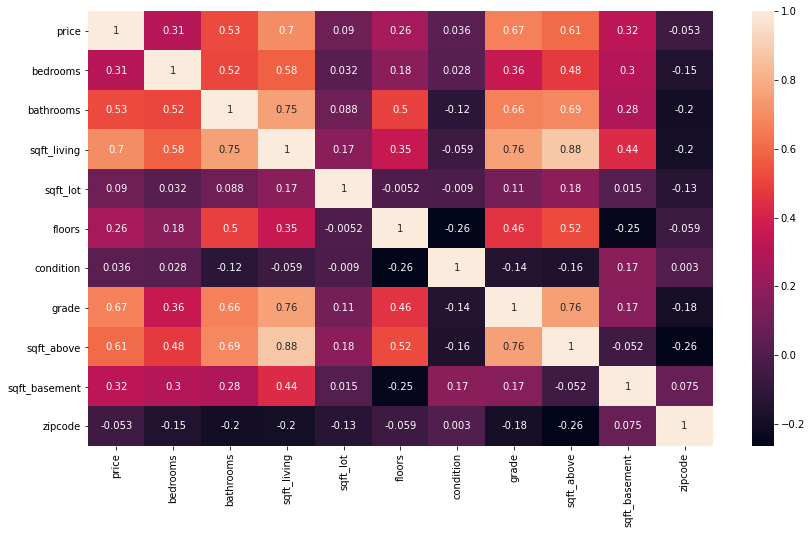

In [14]:
plt.figure(figsize=(14,8))
sns.heatmap(correlations,annot=True)

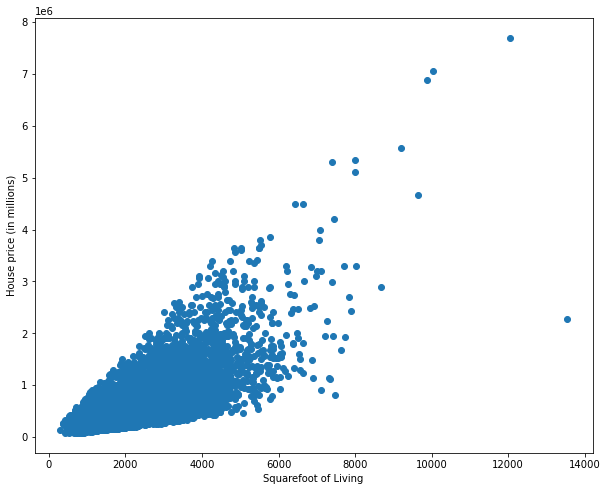

In [21]:
#Scallter plot
plt.figure(figsize=(10,8))
plt.scatter(df['sqft_living'],df['price'])
plt.xlabel('Squarefoot of Living')
plt.ylabel('House price (in millions)')
plt.show()


In [22]:
# Defining our predictor and target variables
X = df[['sqft_living']]
Y = df['price']

In [23]:
#spliting dataset to train and test datasets
x_train, x_test, y_train, y_text=train_test_split(X,Y,test_size=0.20,random_state=0) 


In [25]:
#Building model
lr=LinearRegression()

In [26]:
# Fit the linear regression model object to our data
lr.fit(x_train,y_train)

LinearRegression()

In [27]:
lr.predict(x_test)

array([ 357794.53578527, 1278433.11741683,  360636.01288907, ...,
        337904.19605866,  221403.63480282,  417465.5549651 ])

-48536.69005828805
[284.14771038]


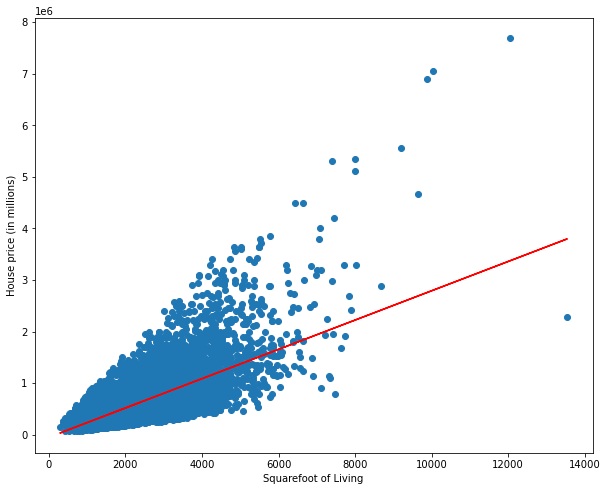

In [47]:
print(lr.intercept_)
print(lr.coef_)
#Scallter plot
plt.figure(figsize=(10,8))
plt.scatter(df['sqft_living'],df['price'])
plt.xlabel('Squarefoot of Living')
plt.ylabel('House price (in millions)')

plt.plot(x_train,lr.coef_*x_train+lr.intercept_,'-r')
#plt.label('Intercept:-48536.69 \nslope:284.1')
plt.show()
